In [1]:
# Import dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# Create a path reference to the file 
heart_path = Path("resources/heart.csv")

In [2]:
# Read CSV into DataFrame
df = pd.read_csv(heart_path, delimiter=",")

# Preview DataFrame
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Check for values of zero in features that are int or float, as these may be spurious
age_zero = (df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS',	'MaxHR', 'Oldpeak']] == 0).sum()
print(age_zero)

Age              0
RestingBP        1
Cholesterol    172
FastingBS      704
MaxHR            0
Oldpeak        368
dtype: int64


In [4]:
df_no_zeros = df[df["Cholesterol"] != 0]    

In [5]:
df_no_zeros = df_no_zeros[df_no_zeros["RestingBP"] != 0]

In [6]:
age_zero = (df_no_zeros[['Age', 'RestingBP', 'Cholesterol', 'FastingBS',	'MaxHR', 'Oldpeak']] == 0).sum()
print(age_zero)

Age              0
RestingBP        0
Cholesterol      0
FastingBS      621
MaxHR            0
Oldpeak        317
dtype: int64


In [7]:
df_no_zeros.to_csv("resources/heart_no_zeros.csv", index=False)

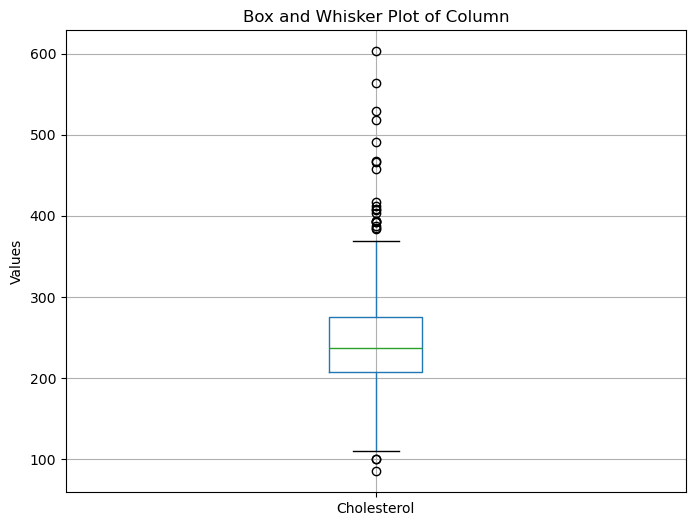

In [8]:
# Create a box plot of the specified column
plt.figure(figsize=(8, 6))
df_no_zeros.boxplot(column='Cholesterol')
plt.title('Box and Whisker Plot of Column')
plt.ylabel('Values')
plt.show()

(array([ 12.,  91., 288., 229.,  96.,  17.,   5.,   4.,   2.,   2.]),
 array([ 85. , 136.8, 188.6, 240.4, 292.2, 344. , 395.8, 447.6, 499.4,
        551.2, 603. ]),
 <BarContainer object of 10 artists>)

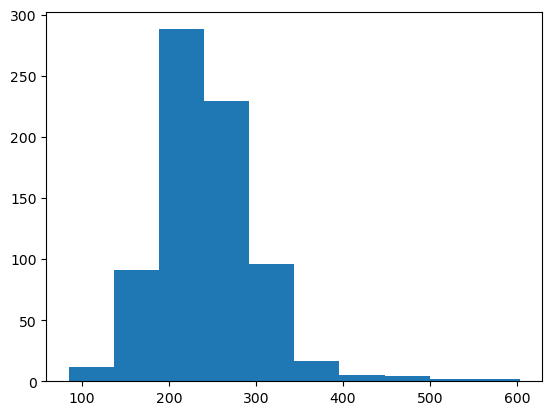

In [9]:
plt.hist(df_no_zeros["Cholesterol"])

In [10]:
Ch_replacement = df_no_zeros["Cholesterol"].median()
df_no_zeros["Cholesterol"].median()

237.0

In [11]:
df_no_zeros["Cholesterol"].mean()

244.6353887399464

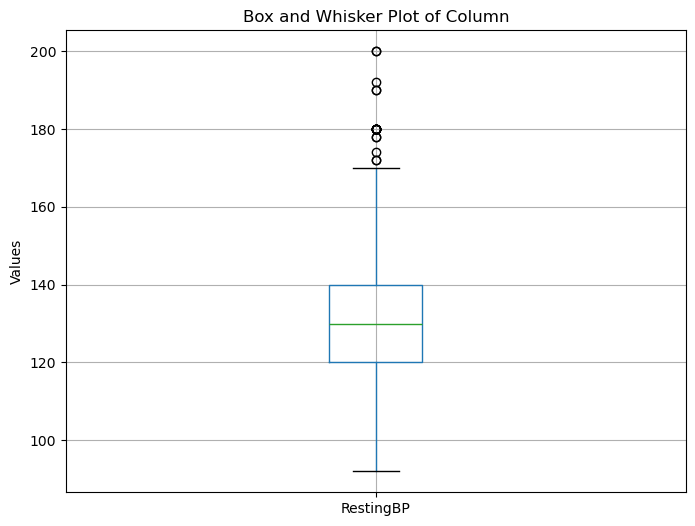

In [12]:
plt.figure(figsize=(8, 6))
df_no_zeros.boxplot(column='RestingBP')
plt.title('Box and Whisker Plot of Column')
plt.ylabel('Values')
plt.show()

(array([ 19.,  77., 153., 187., 166.,  67.,  45.,  17.,  10.,   5.]),
 array([ 92. , 102.8, 113.6, 124.4, 135.2, 146. , 156.8, 167.6, 178.4,
        189.2, 200. ]),
 <BarContainer object of 10 artists>)

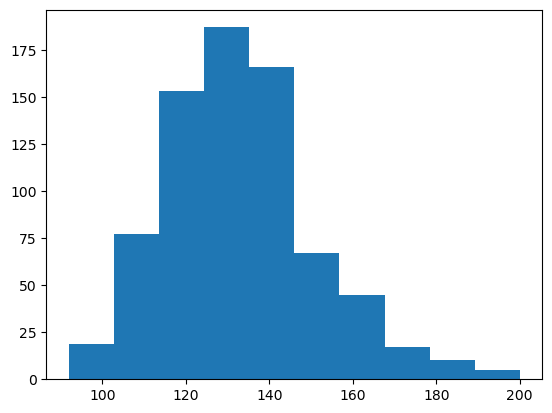

In [13]:
plt.hist(df_no_zeros["RestingBP"])

In [14]:
BP_replacement = df_no_zeros["RestingBP"].median()
df_no_zeros["RestingBP"].median()

130.0

In [15]:
df_no_zeros["RestingBP"].mean()

133.02278820375335

In [16]:
cleaned_df = df.copy()
cleaned_df['Cholesterol'] = cleaned_df['Cholesterol'].replace(0, Ch_replacement)
cleaned_df['RestingBP'] = cleaned_df['RestingBP'].replace(0, BP_replacement)

In [17]:
cleaned_df.to_csv("resources/heart_replaced_values.csv", index=False)

In [18]:
age_zero = (cleaned_df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS',	'MaxHR', 'Oldpeak']] == 0).sum()
print(age_zero)

Age              0
RestingBP        0
Cholesterol      0
FastingBS      704
MaxHR            0
Oldpeak        368
dtype: int64


In [19]:
len(cleaned_df)

918

In [20]:
len(df_no_zeros)

746

In [21]:
len(df)

918

In [22]:
age_zero = (df[['HeartDisease']] == 1).sum()
print(age_zero)

HeartDisease    508
dtype: int64


In [27]:
((df['HeartDisease'] == 1) & (df["Cholesterol"] == 0)).sum()

152